El modelo del Votante, consiste en modelar un sistema donde los individuos observan/comparan la opinion de sus individuos mas cercanos y en funcion de si sus opiniones son iguales o distintas, estos cambian o mantienen su opinion.

La ecuacion que gobierna esta dinamica es la siguiente:

 $\frac{d}{dt} P(s) = - \sum_x w_x (s) P(s) + \sum_x w_x (s^x) P (s^x)$.\n
 
 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [66]:
def rneighbour(x, i, j): #Escoge un vecino aleatorio de acuerdo al vecindario Von Neumann
    N = len(x)
    choice = [0, 1, -1]
    choice1 = [1,-1]
    id_i = np.random.choice(choice)
    if id_i == 0:
        id_j = np.random.choice(choice1)
    else:
        id_j = 0
    return x[(i+id_i)%N, (j+id_j)%N]#returna el valor del vecino escogido, con cond de borde periodica

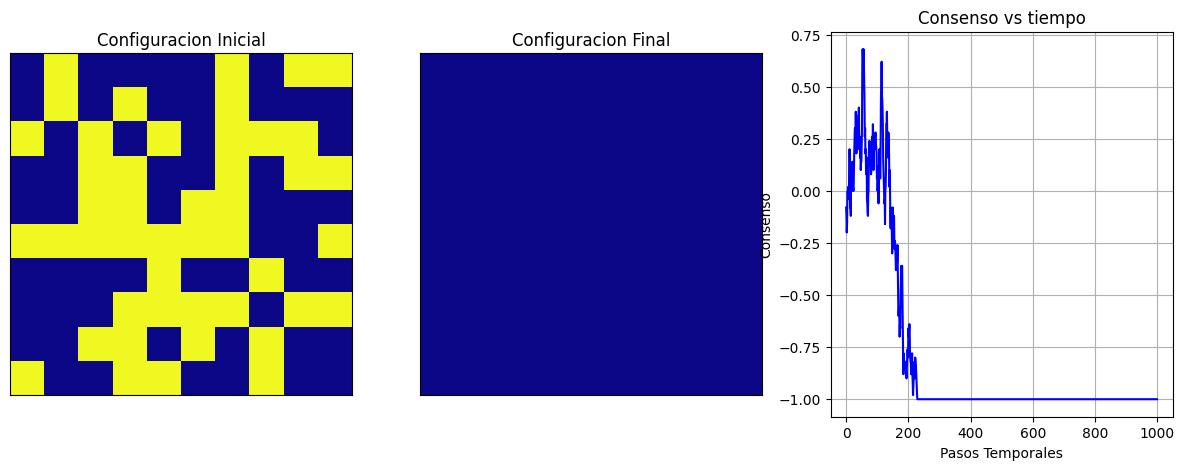

Tiempo ocupado (h:m:s:ns): 0:00:01.530147
**FIN**


In [146]:
tini = datetime.now()
N=10
steps = 1000
beta = 1
curr_state = np.random.choice(np.array([-1,1]),size=(N,N))
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

# Figura Estado Inicial
ax1.matshow(curr_state, cmap = plt.cm.plasma) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Configuracion Inicial")
#-----------------------------------------------
# Dinamica
M = np.zeros(steps)#Definimos un array donde guardar la magnetizacion

for i in range(steps):
    M[i] = np.sum(curr_state)#Guardamos el valor de la suma de la magnetizacion para cada iteracion

   # Evaluacion por espin
    for n in range(N**2):
        #elige un espin en la posicion (i,j) aleatoriamente
        i, j = np.random.randint(N), np.random.randint(N)
        #escoge el vecino aleatorio usando la funcion de arriba 
        vecino_aleatorio = rneighbour(curr_state, i, j)
        if curr_state[i,j] == vecino_aleatorio: #compara el valor del vecino con el indice aleatorio
            pass
        else:
            curr_state[i,j] = vecino_aleatorio
#-----------------------------------------------
# Figura Estado Final
ax2.matshow(curr_state, cmap = plt.cm.plasma) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Configuracion Final")
#-----------------------------------------------
# Figura Magnetizacion
ax3.plot(M/N**2,'-b')
ax3.set_xlabel("Pasos Temporales")
ax3.set_ylabel("Consenso")
ax3.set_title("Consenso vs tiempo")
ax3.grid(True)
#-----------------------
plt.show()
#===============================================================================================
# Fin contador temporal del programa
tfin = datetime.now()
dtie = tfin - tini
print('Tiempo ocupado (h:m:s:ns):', dtie)
#-----------------------------------------------
print('========')
print('**FIN**')